A practical introduction to quantum computing by Elias Combarro (2/7):

https://www.youtube.com/watch?v=SPQ-rvtaREs&ab_channel=CERNLectures

In [ ]:
!pip install -q qiskit==0.16.1
!pip install -q --upgrade pylatexenc

In [4]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

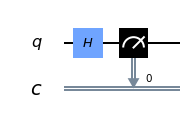

In [5]:
circ_random = QuantumCircuit(1, 1)
circ_random.h(0)
circ_random.measure(range(1), range(1))
circ_random.draw(output='mpl')

In [6]:
n = 100
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_random, backend, shots=n, memory=True) #memory to recover the seq of measurements
bits_alice = [int(q) for q in job.result().get_memory()]
print(bits_alice)

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [8]:
job = execute(circ_random, backend, shots=n, memory=True)
basis_alice = [int(q) for q in job.result().get_memory()]
print(basis_alice)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [7]:
job = execute(circ_random, backend, shots=n, memory=True)
basis_bob = [int(q) for q in job.result().get_memory()]
print(basis_bob)

[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]


In [9]:
bits_bob = []

for i in range(n):
  circ_send = QuantumCircuit(1, 1)
  if bits_alice[i]:
    circ_send.x(0)
  if basis_alice[i]:
    circ_send.h(0)
  
  if basis_bob[i]:
    circ_send.h(0)
  
  circ_send.measure(0, 0)

  job = execute(circ_send, backend, shots=1, memory=True)
  bits_bob.append(int(job.result().get_memory()[0]))

print(bits_bob)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]


In [10]:
key = []

for i in range(n):
  if basis_alice[i] == basis_bob[i]:
    key.append(bits_bob[i])

print("Key length", len(key))
print(key)

Key length 49
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
